# Stage 2 Data analysis and Modelling 

---

---
## Contents
1. Relationship Analysis among attributes
2. Correlation Matrix
2. Modelling

In [1]:
import requests
import json
import pandas as pd
import re
import math
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', 50) # show all columns
pd.set_option('display.max_rows', 500) # show all rows
from matplotlib.colors import LogNorm
    

#### load the combined dataset

## Marker format!!

In [2]:
df = pd.read_csv('../data/final_data2.csv')

### Relationship Analysis among attributes

In [3]:
# Based on 44 countries
countries = df['LOCATION'].unique() 
len(countries)

44

In [4]:
df['TIME'].unique()

array([2015, 2016, 2017], dtype=int64)

### Q1: Do Happiness score is related to the happiness rank? 
**Two way relationship**

We feel there are positive relationship between score and rank. i,e, higher score, lower(better) rank

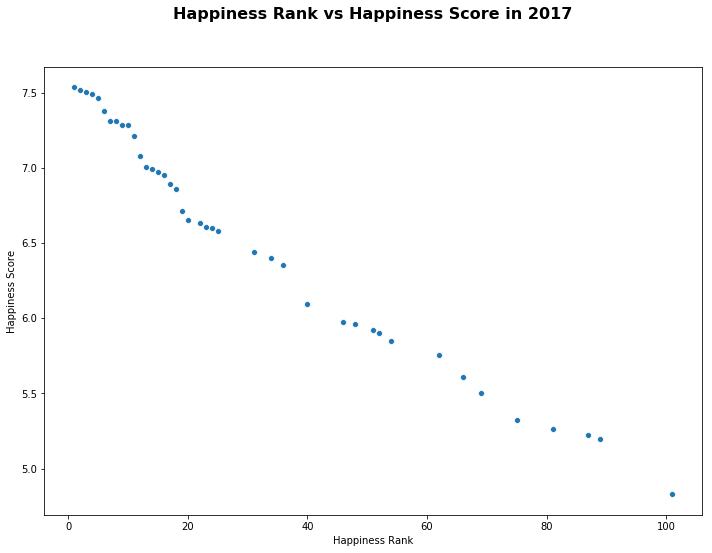

In [5]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Happiness Rank","Happiness Score", data=df[df['TIME']==2017])
ax.text(x=0.5, y=1.1, s='Happiness Rank vs Happiness Score in 2017', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 8)
#plt.xlim(0, 1.8)

fig.tight_layout()
plt.show()

Based on plot above, yes! higher score, lower(better) rank
#### Thus, in the following analysis, we use happiness score as the interested feature we want to focus on analysis and predict

### Q2: Is there positive relationship between GDP and Hapinesss score?
**Four way relatipnship**
Intuitively, we feel higher GDP, higher Hapiness score

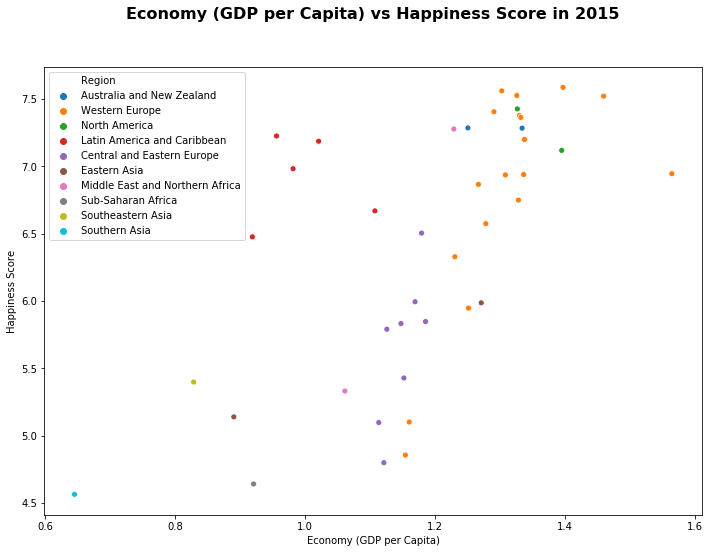

In [6]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Economy (GDP per Capita)","Happiness Score",hue='Region', data=df[df['TIME'] == 2015])
ax.text(x=0.5, y=1.1, s='Economy (GDP per Capita) vs Happiness Score in 2015', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 8)
#plt.xlim(0, 1.8)

fig.tight_layout()
plt.show()

- The cuntry with higher GDP generally has higher Happiness score
- However, the countries in `Latin America and Caribbeam` region have high happiness score but relatevely low GDP

### Q3: Is there positive relationship between Air pollution and Hapinesss score?
**Four way relatipnship**

Intuitively, we feel lower air pollution, higher Hapiness score

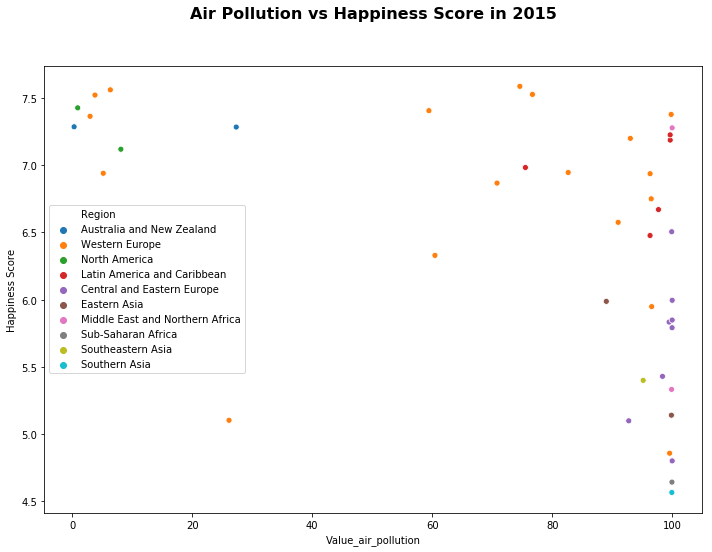

In [7]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Value_air_pollution","Happiness Score",hue='Region', data=df[df['TIME'] == 2015])
ax.text(x=0.5, y=1.1, s='Air Pollution vs Happiness Score in 2015', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 10)
#plt.xlim(0, 110)

fig.tight_layout()
plt.show()


- the countries with lower air pollution are more likely to have higher happiness score
- most country have quite high air pollutions
- The country generally either quite low air pollution or quite high air pollution

### Q4: Is there any country change Happiness score a lot from 2015 to 2017, which can be caused by GDP or Air pollution?
**Five way relatipnship** (Build table)

If the country's score changed more than 0.5 from 2015 to 2017, Is it possible be caused by GDP or air pollution?

In [8]:
for country in df['LOCATION'].unique():
    sub_data = df[df['LOCATION'] == country]  # select data from that year
    score_2015 = 0
    score_2017=0
    GDP_2015 = 0
    GDP_2017 = 0
    air_pollution_2015=0
    air_pollution_2017=0
    for index, row in sub_data.iterrows():
        if row['TIME']==2015:
            score_2015 = row['Happiness Score']
            GDP_2015 = row['Economy (GDP per Capita)']
            air_pollution_2015 =row['Value_air_pollution']
        if row['TIME']==2017:
            score_2017 = row['Happiness Score']
            GDP_2017  = row['Economy (GDP per Capita)']
            air_pollution_2017 = row['Value_air_pollution']
        
    if abs(float(score_2015)- float(score_2017)) >0.5 and float(score_2017)!=0 and float(score_2015)!=0:   # If the country's score changed more than 0.5 from 2015 to 2017
        print(country)
        print()
        print("Happiness Score in 2015 is{}".format(score_2015))
        print("Happiness Score in 2017 is{}".format(score_2017))
        print()
        print("GDP in 2015 is{}".format(GDP_2015))
        print("GDP in 2017 is{}".format(GDP_2017))
        print()
        print("Air pollution in 2015 is{}".format(air_pollution_2015))
        print("Air pollution in 2017 is{}".format(air_pollution_2017))
        
    
        print("--------------------")

Hungary

Happiness Score in 2015 is4.8
Happiness Score in 2017 is5.32399988174438

GDP in 2015 is1.12094
GDP in 2017 is1.2860119342803995

Air pollution in 2015 is100.0
Air pollution in 2017 is100.0
--------------------
Latvia

Happiness Score in 2015 is5.098
Happiness Score in 2017 is5.849999904632571

GDP in 2015 is1.11312
GDP in 2017 is1.26074862480164

Air pollution in 2015 is92.75871
Air pollution in 2017 is89.26035999999998
--------------------
Mexico

Happiness Score in 2015 is7.187
Happiness Score in 2017 is6.57800006866455

GDP in 2015 is1.02054
GDP in 2017 is1.15318381786346

Air pollution in 2015 is99.66904
Air pollution in 2017 is99.64624
--------------------


### Q4: Is there relationship among Value_avg_annual_hours and GDP?
**Four way relatipnship**

Intuitively, We believe longer working hours, higher GDP

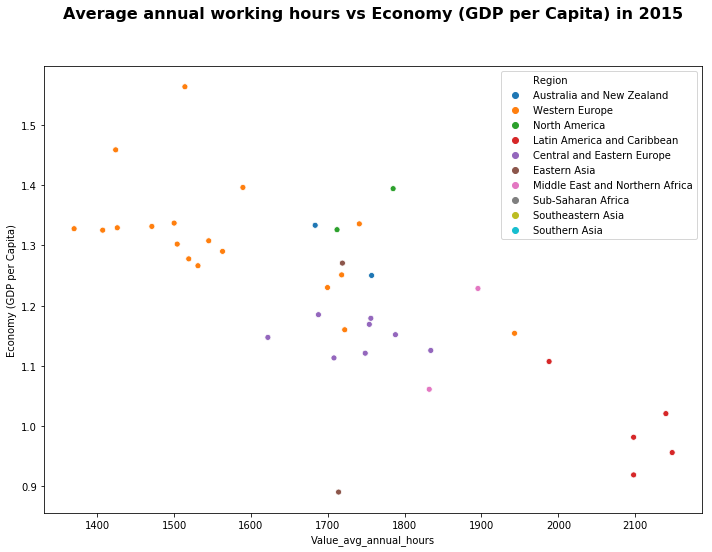

In [9]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Value_avg_annual_hours","Economy (GDP per Capita)",hue='Region', data=df[df['TIME'] == 2015])
ax.text(x=0.5, y=1.1, s='Average annual working hours vs Economy (GDP per Capita) in 2015', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 8)
#plt.xlim(0, 1.8)

fig.tight_layout()
plt.show()

- Lower average annual working hours, higher GDP! make since, developed country
- The countries in `Latin America and Caribbeam` region have much longer working hours, and GPA quite low. But they have high happiness score!! strangth

### Q5: What possible reasons that cause countries in `Latin America and Caribbeam` region has high happincess score
Low GDP, heavy air pollution, and quite long annual working hours

## Correlation matrix
Seems not useful information can get

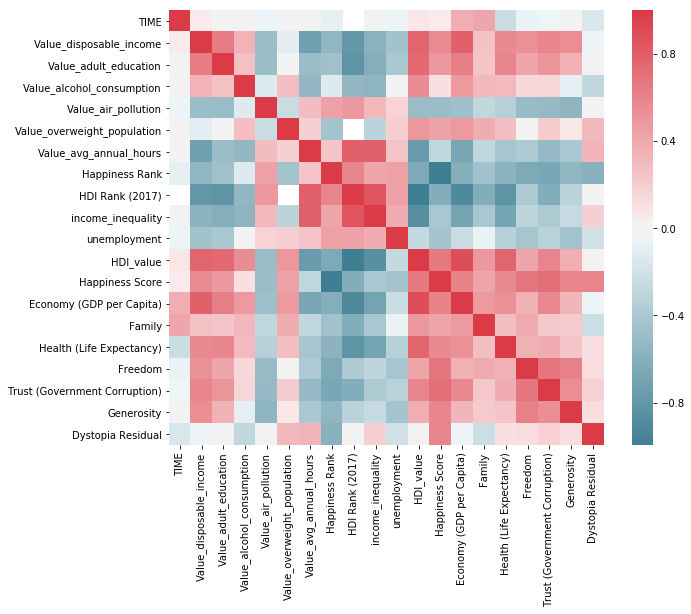

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Which countries are happiest?

In [11]:
#Country with lowest and highest happiness scores for each year 
idx1 = df[df["TIME"] == 2015]["Happiness Score"].idxmin()
print(df.loc[idx1][["LOCATION", "Happiness Score"]])

idx2 = df[df["TIME"] == 2016]["Happiness Score"].idxmin()
print(df.loc[idx2][["LOCATION", "Happiness Score"]])

idx3 = df[df["TIME"] == 2017]["Happiness Score"].idxmin()
print(df.loc[idx3][["LOCATION", "Happiness Score"]])

idx1 = df[df["TIME"] == 2015]["Happiness Score"].idxmax()
print(df.loc[idx1][["LOCATION", "Happiness Score"]])

idx2 = df[df["TIME"] == 2016]["Happiness Score"].idxmax()
print(df.loc[idx2][["LOCATION", "Happiness Score"]])

idx3 = df[df["TIME"] == 2017]["Happiness Score"].idxmax()
print(df.loc[idx3][["LOCATION", "Happiness Score"]])

LOCATION           India
Happiness Score    4.565
Name: 124, dtype: object
LOCATION           India
Happiness Score    4.404
Name: 125, dtype: object
LOCATION           South Africa
Happiness Score           4.829
Name: 96, dtype: object
LOCATION           Switzerland
Happiness Score          7.587
Name: 12, dtype: object
LOCATION           Denmark
Happiness Score      7.526
Name: 24, dtype: object
LOCATION           Norway
Happiness Score     7.537
Name: 73, dtype: object


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

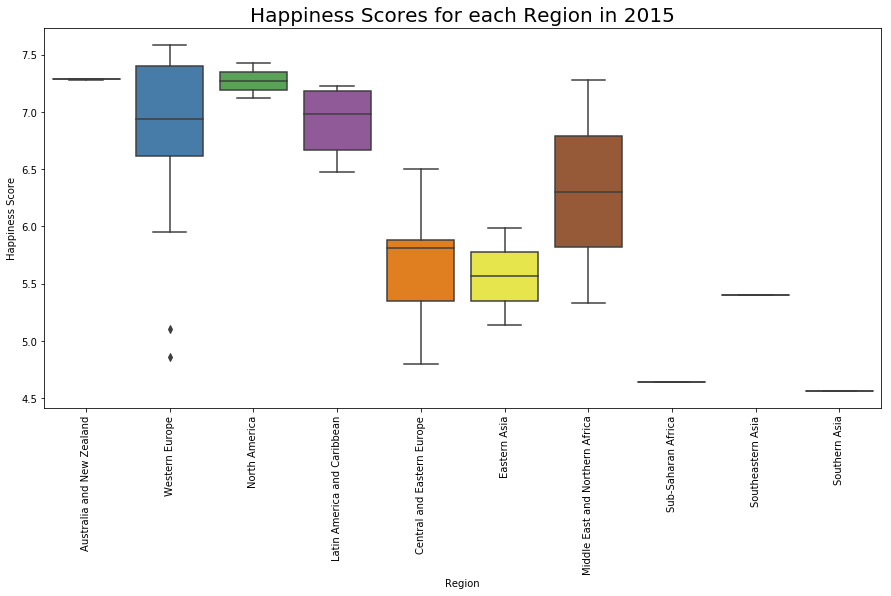

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x="Region", y = "Happiness Score", data = df[df["TIME"] == 2015], palette = "Set1")
ax.set_title("Happiness Scores for each Region in 2015", fontsize = 20)
plt.xticks(rotation=90)

In [17]:
df[(df["TIME"] == 2015) & (df["Region"] == "Western Europe")].sort_values(by = "Happiness Score").head(5)

,LOCATION,TIME,Value_disposable_income,Value_adult_education,Value_alcohol_consumption,Value_air_pollution,Value_overweight_population,Value_avg_annual_hours,Happiness Rank,HDI Rank (2017),income_inequality,unemployment,HDI_value,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
41,Greece,2015,19350.655670,29.057495,6.6,99.57455,61.833333,1943.0,102.0,NaN,12.1,24.9,0.866,Western Europe,4.857,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101
78,Portugal,2015,22111.573380,22.857506,10.5,26.15617,57.033333,1722.0,88.0,NaN,10.1,12.4,0.842,Western Europe,5.102,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462
50,Italy,2015,27538.742632,17.546457,7.1,96.58121,58.033333,1718.0,50.0,NaN,11.2,11.9,0.876,Western Europe,5.948,1.25114,1.19777,0.95446,0.26236,0.02901,0.22823,2.02518
26,Spain,2015,24791.232937,35.081161,8.3,60.46667,61.200000,1699.6,36.0,NaN,10.1,22.1,0.885,Western Europe,6.329,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367
35,France,2015,31918.287796,34.085361,11.9,90.99463,59.100000,1519.0,29.0,NaN,9.3,10.4,0.898,Western Europe,6.575,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126


In [16]:
df[(df["TIME"] == 2015) & (df["Region"] == "Western Europe")].sort_values(by = "Happiness Score").tail(5)

,LOCATION,TIME,Value_disposable_income,Value_adult_education,Value_alcohol_consumption,Value_air_pollution,Value_overweight_population,Value_avg_annual_hours,Happiness Rank,HDI Rank (2017),income_inequality,unemployment,HDI_value,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
32,Finland,2015,31218.067816,42.742619,8.5,59.464263,57.500000,1563.0,6.0,NaN,5.7,9.4,0.915,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
71,Norway,2015,36642.303819,42.706734,6.0,3.821070,57.800000,1423.9,4.0,NaN,5.4,4.3,0.948,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
23,Denmark,2015,30514.921807,37.095581,9.3,76.712060,55.066667,1407.0,3.0,NaN,7.0,6.2,0.926,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
111,Iceland,2015,31883.018834,38.841152,7.7,6.377800,58.700000,1504.0,2.0,NaN,5.7,4.0,0.927,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
12,Switzerland,2015,38727.399429,39.782719,9.5,74.617330,53.900000,1589.5,1.0,NaN,8.4,4.8,0.942,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


### A closer analysis on top 5 and  bottom 5 countries in 2015

In [97]:
df_sort_happiness = df.sort_values(by = ["Happiness Score"])
df_sort_happiness = df_sort_happiness[df_sort_happiness["TIME"] == 2015]

In [98]:
df_sort_happiness.tail(5)

,LOCATION,TIME,Value_disposable_income,Value_adult_education,Value_alcohol_consumption,Value_air_pollution,Value_overweight_population,Value_avg_annual_hours,Happiness Rank,HDI Rank (2017),income_inequality,unemployment,HDI_value,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
9,Canada,2015,31845.932814,55.173660,8.0,0.94055,63.666667,1712.0,5.0,NaN,8.7,6.9,0.920,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
71,Norway,2015,36642.303819,42.706734,6.0,3.82107,57.800000,1423.9,4.0,NaN,5.4,4.3,0.948,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
23,Denmark,2015,30514.921807,37.095581,9.3,76.71206,55.066667,1407.0,3.0,NaN,7.0,6.2,0.926,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
111,Iceland,2015,31883.018834,38.841152,7.7,6.37780,58.700000,1504.0,2.0,NaN,5.7,4.0,0.927,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
12,Switzerland,2015,38727.399429,39.782719,9.5,74.61733,53.900000,1589.5,1.0,NaN,8.4,4.8,0.942,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [99]:
df_sort_happiness.head(5)

,LOCATION,TIME,Value_disposable_income,Value_adult_education,Value_alcohol_consumption,Value_air_pollution,Value_overweight_population,Value_avg_annual_hours,Happiness Rank,HDI Rank (2017),income_inequality,unemployment,HDI_value,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
124,India,2015,NaN,NaN,3.0,99.94157,19.100000,NaN,117.0,NaN,26.5,3.5,0.627,Southern Asia,4.565,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
94,South Africa,2015,9090.913293,6.988939,7.1,99.96025,52.566667,NaN,113.0,NaN,32.0,25.2,0.692,Sub-Saharan Africa,4.642,0.92049,1.18468,0.27688,0.33207,0.08884,0.11973,1.71956
44,Hungary,2015,17789.928879,24.242552,10.8,100.00000,61.166667,1748.7,104.0,NaN,7.6,6.8,0.834,Central and Eastern Europe,4.800,1.12094,1.20215,0.75905,0.32112,0.02758,0.12800,1.24074
41,Greece,2015,19350.655670,29.057495,6.6,99.57455,61.833333,1943.0,102.0,NaN,12.1,24.9,0.866,Western Europe,4.857,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101
62,Latvia,2015,16877.340080,31.591949,10.8,92.75871,57.500000,1708.0,89.0,NaN,10.3,9.9,0.841,Central and Eastern Europe,5.098,1.11312,1.09562,0.72437,0.29671,0.06332,0.18226,1.62215


In [100]:
top5_countries = df_sort_happiness["LOCATION"].tail(5).values
bottom5_countries = df_sort_happiness["LOCATION"].head(5).values

In [101]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() #normalise to make variables comparable 
columns = ['Economy (GDP per Capita)', 'Family','Freedom', 
           'Trust (Government Corruption)', 'Generosity', "HDI_value", 
           'unemployment','Value_air_pollution','Value_disposable_income', 'Value_alcohol_consumption']
df_sort_happiness = df_sort_happiness[columns]
df_sort_happiness = df_sort_happiness.dropna()
df_sort_happiness = pd.DataFrame(min_max_scaler.fit_transform(df_sort_happiness[columns]), columns = columns)

In [102]:
df_sort_happiness.columns = ['GDP per Capita', 'Family', 'Freedom','Trust', 'Generosity', 'HDI', 
                             'Unemployment','Air Pollution', 'Disposable Income', 'Alcohol Consumption']
df_sort_happiness.shape

(39, 10)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

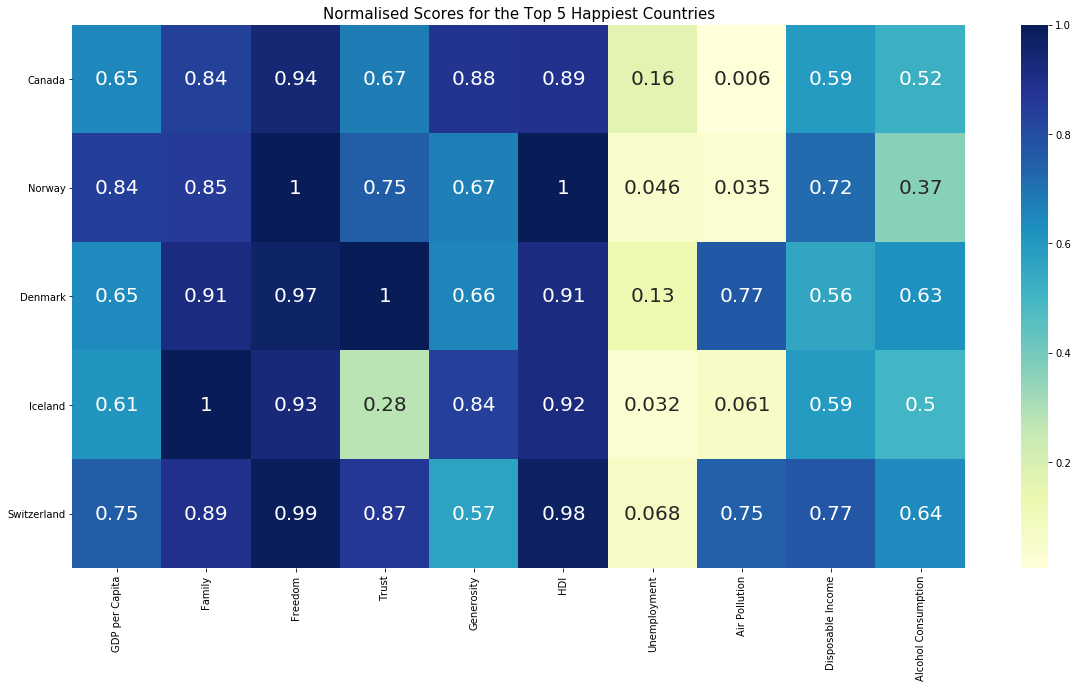

In [103]:
df_top5 = df_sort_happiness.tail(5)

Index = top5_countries 
Cols = list(df_top5.columns)

fig, ax = plt.subplots(figsize=(20,10))
df_top5_heat = pd.DataFrame(df_top5.values,index = Index, columns = Cols)
sns.heatmap(df_top5_heat, annot = True, cmap="YlGnBu", annot_kws={"size": 20})
ax.set_title("Normalised Scores for the Top 5 Happiest Countries", fontsize = 15)
plt.yticks(rotation=0) 

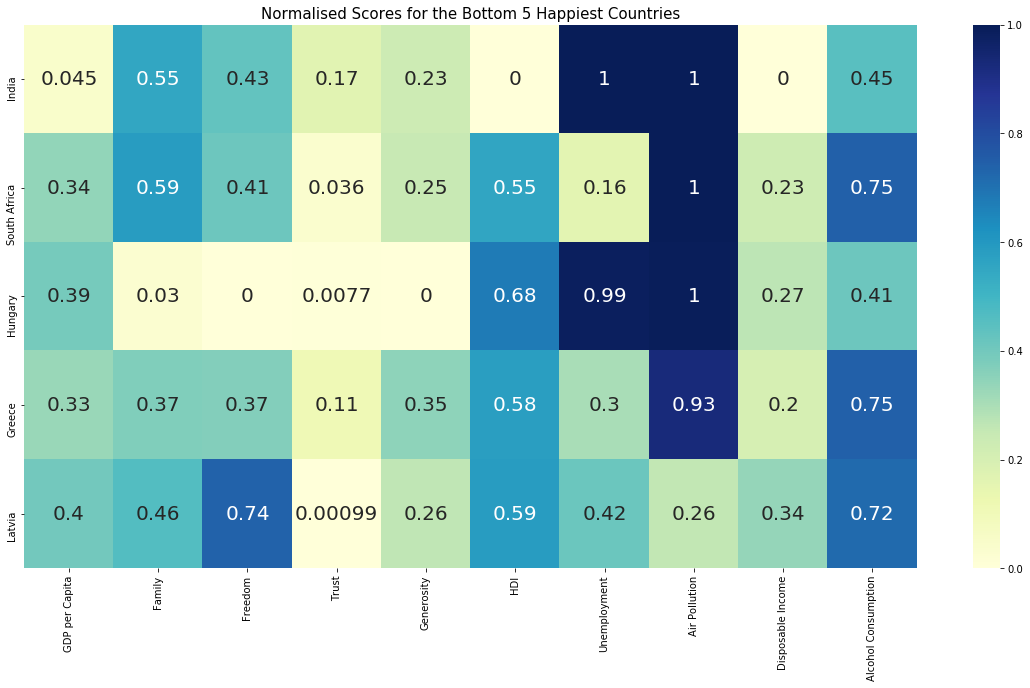

In [104]:
df_bottom5 = df_sort_happiness.head(5)

Index = bottom5_countries 
Cols = list(df_bottom5.columns)

fig, ax = plt.subplots(figsize=(20,10))
df_bottom5_heat = pd.DataFrame(df_bottom5.values,index = Index, columns = Cols)
ax.set_title("Normalised Scores for the Bottom 5 Happiest Countries", fontsize = 15)
sns.heatmap(df_bottom5_heat, annot = True, cmap="YlGnBu", annot_kws={"size": 20})

### Is there a change in happiness score overtime for each region

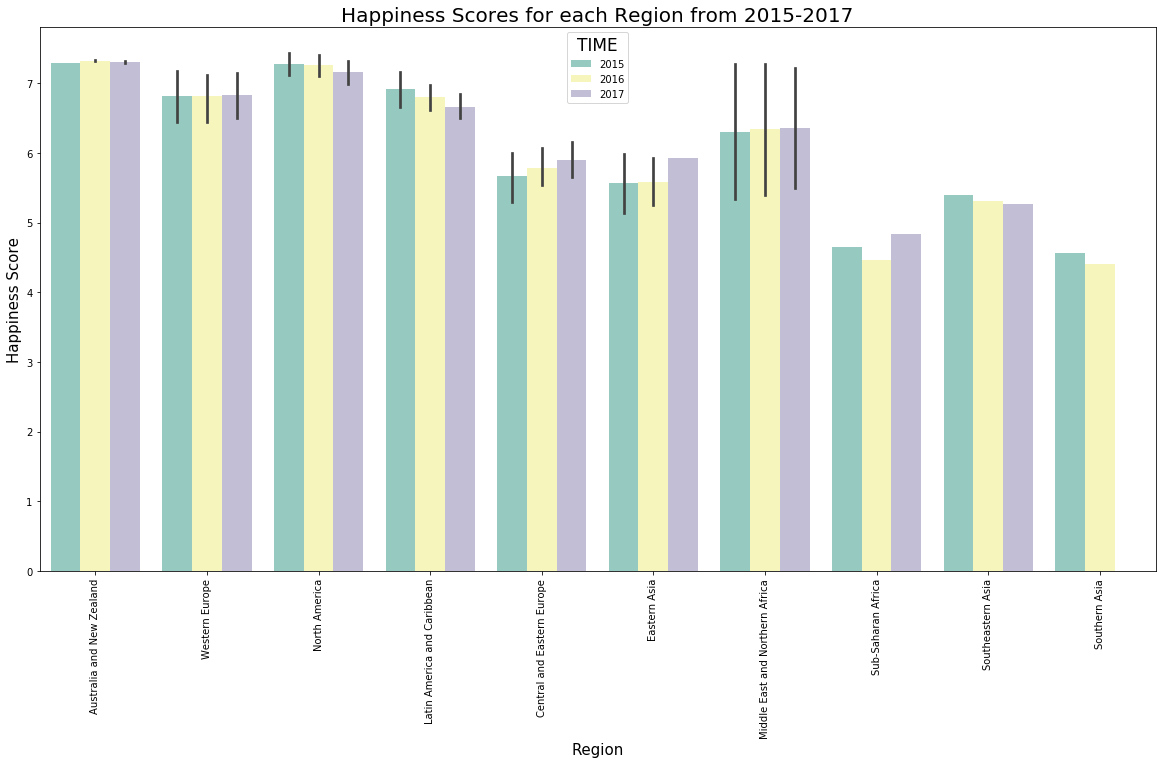

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
plt.rcParams["axes.labelsize"] = 20
g = sns.barplot("Region","Happiness Score", hue = "TIME", data = df, palette="Set3")
ax.set_title("Happiness Scores for each Region from 2015-2017", fontsize = 20)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
plt.xticks(rotation=90) 
plt.show()

In [36]:
groupedvalues.rename(columns={'Happiness Score':'value'}, inplace=True)

In [41]:
groupedvalues

,TIME,Region,value
0,2015,Australia and New Zealand,7.285000
1,2015,Central and Eastern Europe,5.662375
2,2015,Eastern Asia,5.563500
3,2015,Latin America and Caribbean,6.908600
4,2015,Middle East and Northern Africa,6.305000
5,2015,North America,7.273000
6,2015,Southeastern Asia,5.399000
7,2015,Southern Asia,4.565000
8,2015,Sub-Saharan Africa,4.642000
9,2015,Western Europe,6.822000


In [41]:
df.columns

Index(['LOCATION', 'TIME', 'Value_disposable_income', 'Value_adult_education',
       'Value_alcohol_consumption', 'Value_air_pollution',
       'Value_overweight_population', 'Value_avg_annual_hours',
       'Happiness Rank', 'HDI Rank (2017)', 'income_inequality',
       'unemployment', 'HDI_value', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

### What factors affect happiness score for each region?

In [105]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 
           'Trust (Government Corruption)', 'Generosity']

df_norm = pd.DataFrame(min_max_scaler.fit_transform(df[columns]), columns = columns, index = df.index)
df_norm["Region"] = df["Region"]
df_norm["TIME"] = df["TIME"]

In [106]:
df_norm.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region,TIME
0,0.627729,0.771381,0.926025,0.969763,0.736956,0.712141,Australia and New Zealand,2015
1,0.728782,0.616256,0.826199,0.834246,0.668590,0.774998,Australia and New Zealand,2016
2,0.765233,0.923730,0.817114,0.888599,0.622834,0.780931,Australia and New Zealand,2017
3,0.631057,0.762133,0.874919,0.925758,0.386211,0.540915,Western Europe,2015
4,0.734206,0.600378,0.769615,0.793658,0.441467,0.537269,Western Europe,2016


In [107]:
sum_of_stats = df_norm[df_norm["TIME"] == 2016].groupby("Region")['Economy (GDP per Capita)'].sum()
all_stats = {'Economy (GDP per Capita)' : sum_of_stats.values}
for column in columns: 
    if column != 'Economy (GDP per Capita)':
        stats = df_norm[df_norm["TIME"] == 2016].groupby("Region")[column].sum()
        sum_of_stats += stats 

    #count = df[df["TIME"] == 2016].groupby("Region")[column].count()
    #ratio = stats/count #like an average score 
        all_stats[column] = stats.values

In [108]:
region_list =list(df_norm["Region"].unique())
region_list.sort()
sum_of_stats

Region
Australia and New Zealand           9.100224
Central and Eastern Europe         20.447891
Eastern Asia                        5.561662
Latin America and Caribbean        13.628066
Middle East and Northern Africa     8.409853
North America                       8.122861
Southeastern Asia                   2.581128
Southern Asia                       1.568976
Sub-Saharan Africa                  1.849271
Western Europe                     68.393036
Name: Economy (GDP per Capita), dtype: float64

In [109]:
all_percent = {}
for j in range(0, len(columns)): #for each attribute
    attribute = columns[j]
    list_of_stats = all_stats[attribute]
    for i in range(0, 10): #for each region 
        percentage = list_of_stats[i]/sum_of_stats[i] 
        if attribute in all_percent: 
            all_percent[attribute].append(percentage)
        else:
            all_percent[attribute] = [percentage]     

In [110]:
cumulative_percent = {'Economy (GDP per Capita)': all_percent['Economy (GDP per Capita)']}
for i in range(1,len(columns)):
    attribute = columns[i]
    if attribute == 'Economy (GDP per Capita)':
        continue
    for j in range(0, 10):#for each region 
        if attribute not in cumulative_percent: 
            cumulative_percent[attribute] = [all_percent[attribute][j] + cumulative_percent[columns[i-1]][j]]
        else:
            cumulative_percent[attribute].append(all_percent[attribute][j] + cumulative_percent[columns[i-1]][j])

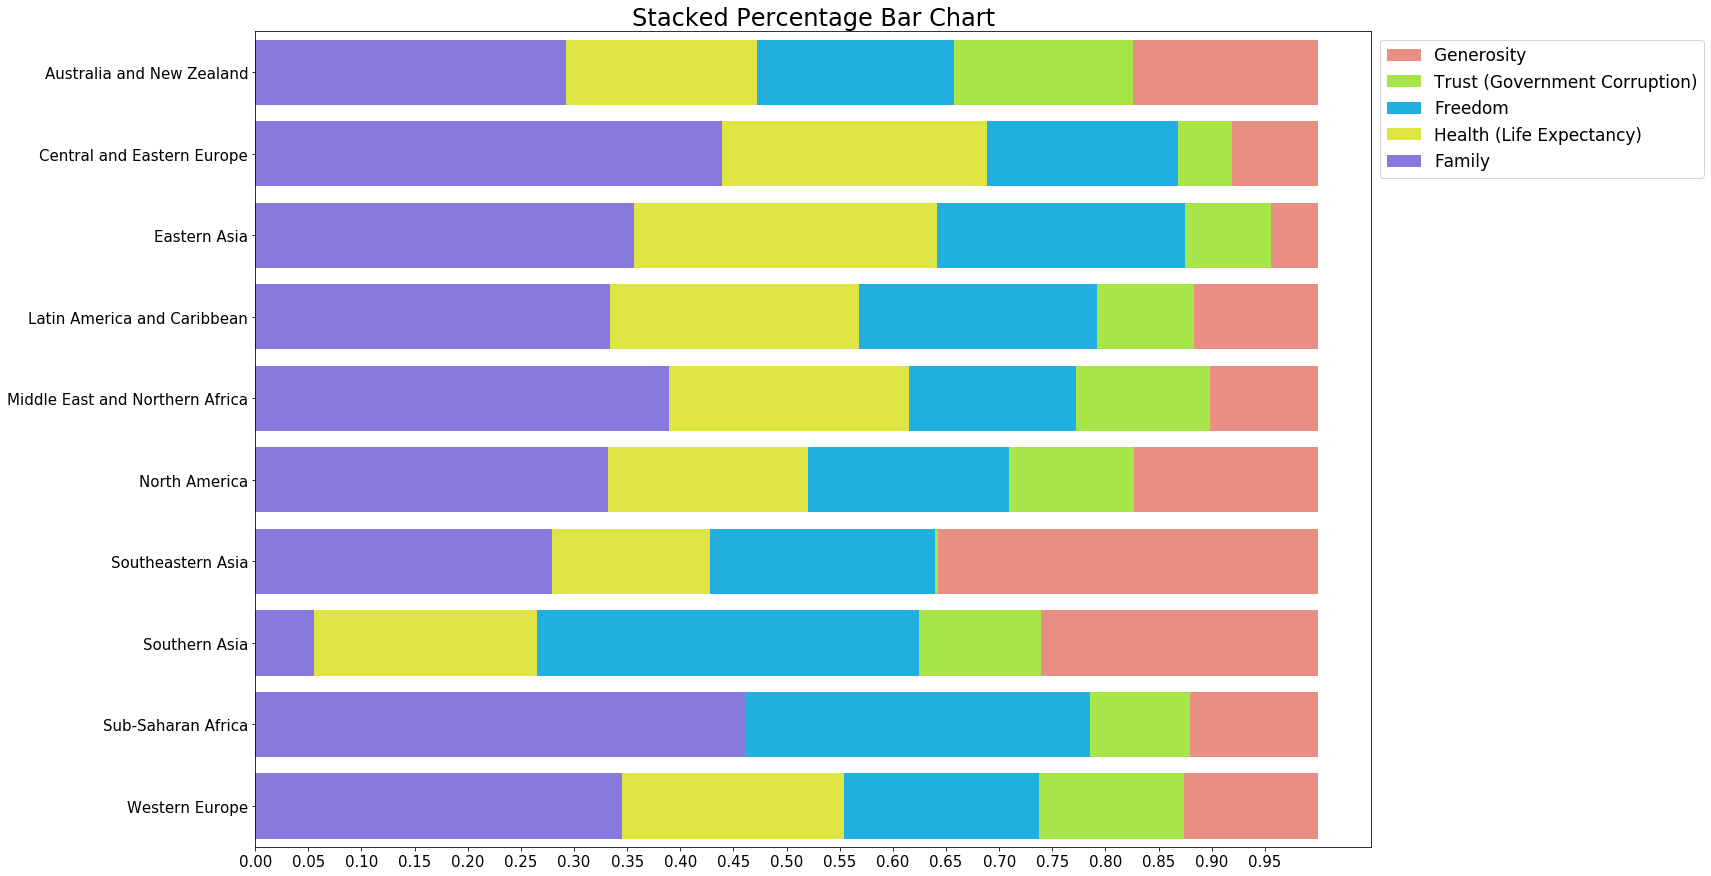

In [113]:
f,ax = plt.subplots(figsize = (20,15))

columns_reverse = columns[::-1]

colours = ['#FA8072', '#ADFF2F', 'deepskyblue', '#F7FF26', 'mediumslateblue']
for i in range(0, 5):
    col = columns_reverse[i]
    sns.barplot(x=cumulative_percent[col], y = region_list, label = col, color = colours[i])
plt.xticks(np.arange(0, 1, 0.05))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(bbox_to_anchor=(1, 1), fontsize = 17)
ax.set_title("Stacked Percentage Bar Chart", fontsize = 24)
plt.show()

### Pairwise Relationships with Happiness Score

In [64]:
columns = ['Happiness Score', 'Region', 'Economy (GDP per Capita)', 'Family','Freedom', 
           'Trust (Government Corruption)', 'Generosity', "HDI_value",
            'Value_avg_annual_hours', 'unemployment','Value_air_pollution']

In [65]:
df_pair = df[df['TIME'] == 2015][columns]

Text(0.5,0.9,'Pairwise Relationships with Happiness Score')

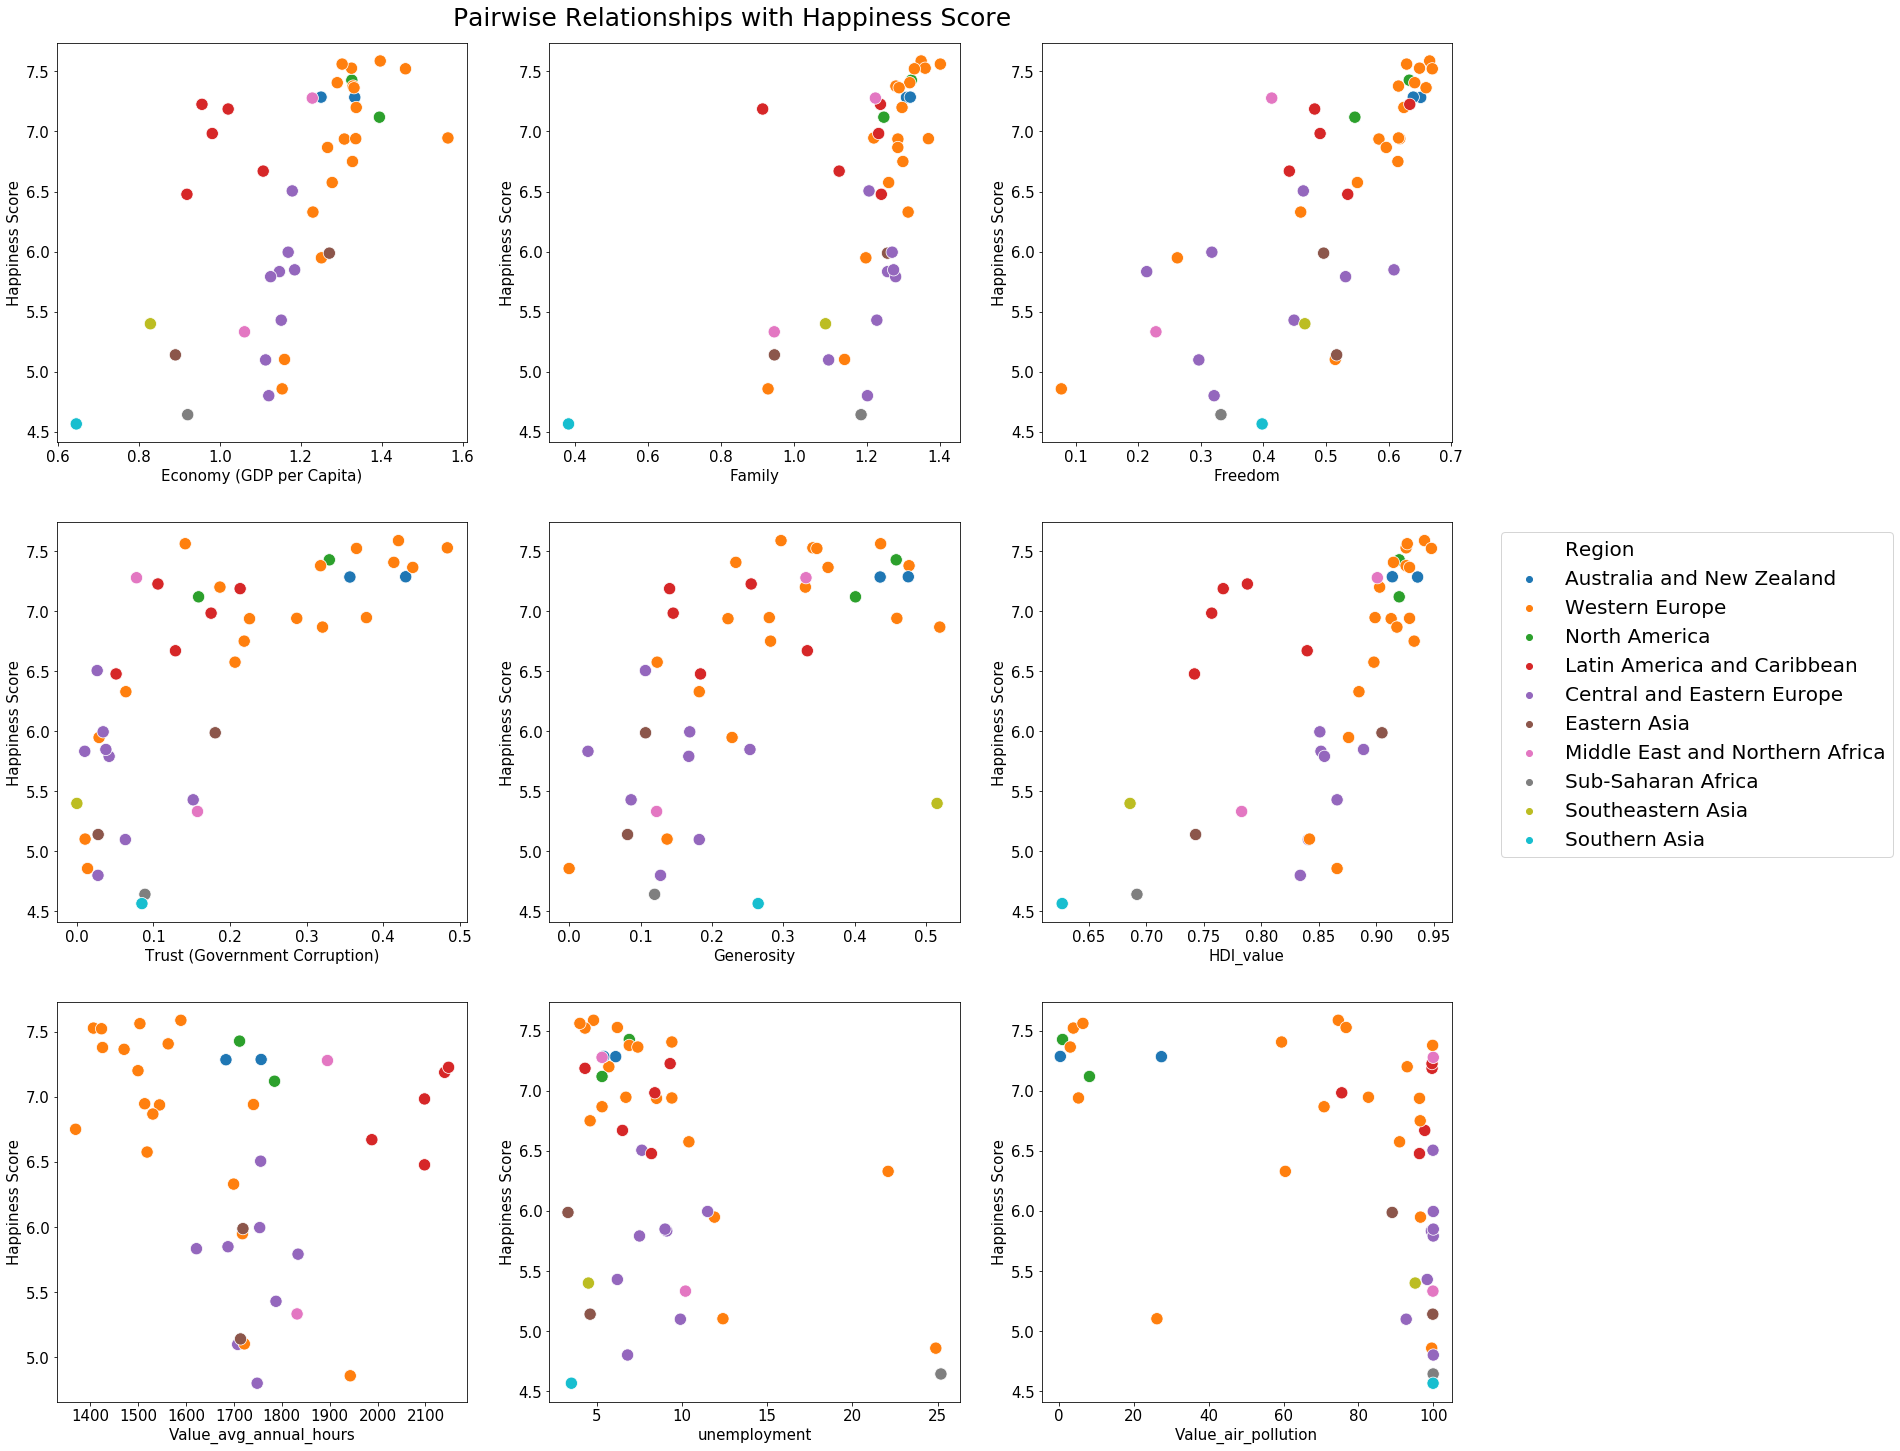

In [74]:
fig, ax = plt.subplots(3,3, figsize = (25,25))

index = 2
for i in range(0,3):
    for j in range(0,3):
        if i == 2 and j == 2:
            sns.scatterplot(columns[index],"Happiness Score",hue='Region', data=df_pair, ax = ax[i,j], s = 150)
            ax[i,j].legend(bbox_to_anchor=(2.1,2.2), fontsize = 20)
        else:
            sns.scatterplot(columns[index],"Happiness Score",hue='Region', data=df_pair, ax = ax[i,j], legend = False, s = 150)
        ax[i,j].xaxis.set_tick_params(labelsize=15)
        ax[i,j].yaxis.set_tick_params(labelsize=15)
        ax[i,j].xaxis.get_label().set_fontsize(15)
        ax[i,j].yaxis.get_label().set_fontsize(15)
        index += 1
fig.suptitle('Pairwise Relationships with Happiness Score', fontsize = 25, x = 0.5, y = 0.9)

### Some other interesting relationships

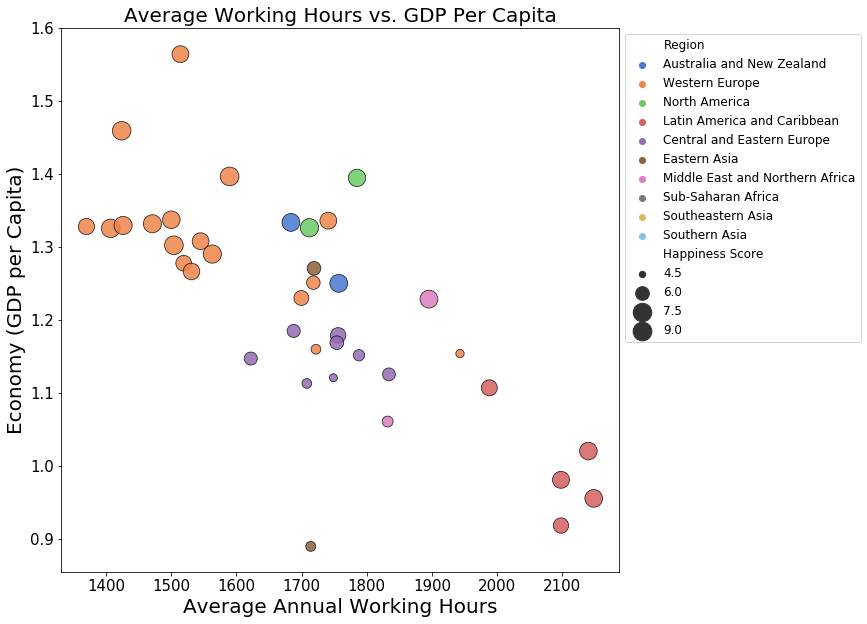

In [122]:
#added size to dots to represent happiness 
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot("Value_avg_annual_hours","Economy (GDP per Capita)",hue='Region', alpha=.85,edgecolor='black',
            size = "Happiness Score", sizes=(40, 350), data=df[df['TIME'] == 2015], palette="muted", ax = ax)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel("Average Annual Working Hours")
ax.set_title("Average Working Hours vs. GDP Per Capita", fontsize = 20)
ax.legend(bbox_to_anchor=(1, 1), fontsize = 12)

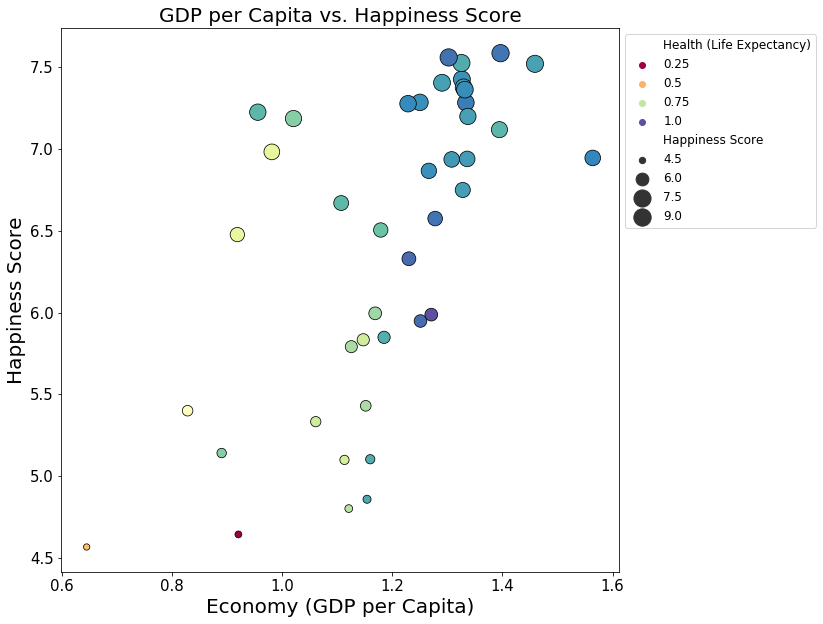

In [121]:
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot("Economy (GDP per Capita)","Happiness Score",hue='Health (Life Expectancy)',edgecolor='black',
            size = "Happiness Score", sizes=(40, 300), data=df[df['TIME'] == 2015], palette = "Spectral",ax = ax)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_title("GDP per Capita vs. Happiness Score", fontsize = 20)

ax.legend(bbox_to_anchor=(1, 1), fontsize = 12)

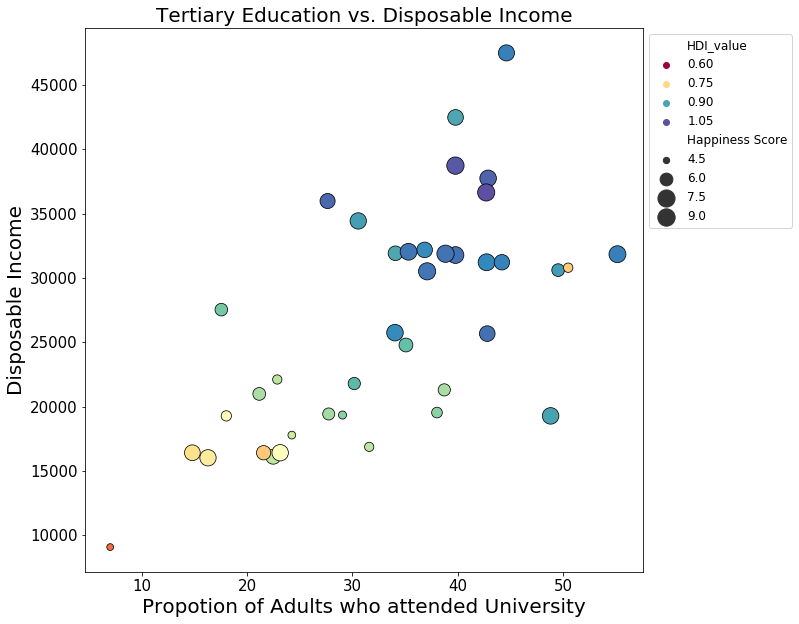

In [123]:
fig, ax = plt.subplots(figsize = (10,10))
plot = sns.scatterplot("Value_adult_education","Value_disposable_income",hue='HDI_value',edgecolor='black',
            size = "Happiness Score", sizes=(40, 300), data=df[df['TIME'] == 2015], palette = "Spectral")
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(bbox_to_anchor=(1, 1), fontsize = 12)
ax.set_xlabel("Propotion of Adults who attended University")
ax.set_ylabel("Disposable Income")
ax.set_title("Tertiary Education vs. Disposable Income", fontsize = 20)

leg = plot.get_legend()
for t in leg.texts:
    if t.get_text() == "HDI_value" or t.get_text() == "Happiness Score":
        continue 
    # truncate label text to 4 characters
    t.set_text(t.get_text()[:4])

### HDI indicators for each Region

In [118]:
HDI_grouped = df[df["TIME"] == 2015].groupby("Region")["HDI_value"].mean()
HDI_grouped = HDI_grouped.sort_values(ascending=False)
HDI_grouped

Region
Australia and New Zealand          0.925000
North America                      0.920000
Western Europe                     0.909722
Central and Eastern Europe         0.855429
Middle East and Northern Africa    0.842000
Eastern Asia                       0.824000
Latin America and Caribbean        0.778800
Sub-Saharan Africa                 0.692000
Southeastern Asia                  0.686000
Southern Asia                      0.627000
Name: HDI_value, dtype: float64

In [119]:
from sklearn.preprocessing import StandardScaler

df2 = df[df['TIME']==2015]
df2 = df[["Health (Life Expectancy)", "Value_adult_education", "income_inequality", "Region"]]
df2 = df2.dropna()
df2.head()
df_standardized = StandardScaler().fit_transform(df2[['Health (Life Expectancy)', 'Value_adult_education', 'income_inequality']])
df_standardized = pd.DataFrame({'Health (Life Expectancy)': df_standardized[:, 0],
                                 'Value_adult_education': df_standardized[:, 1], "income_inequality": df_standardized[:, 2]})


Text(0.5,1,'HDI indicators for each Region')

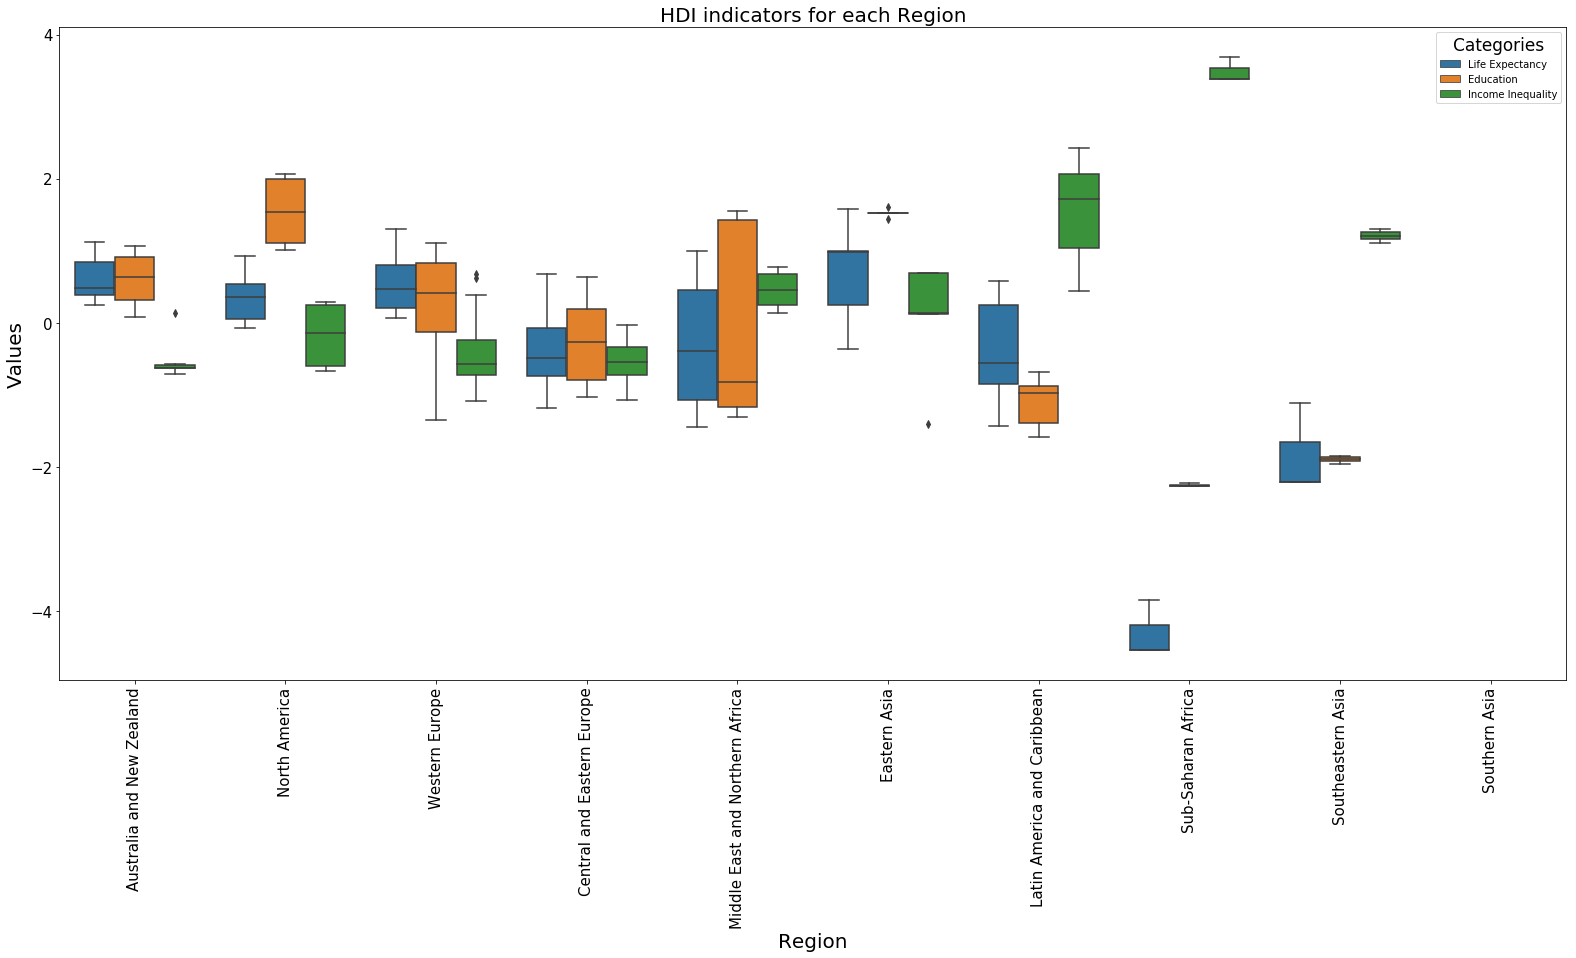

In [124]:
region_cat = df2["Region"].values
#restructure the data
values = np.concatenate((df_standardized["Health (Life Expectancy)"].values,
                        df_standardized["Value_adult_education"].values, df_standardized["income_inequality"].values))
regions = np.concatenate((region_cat, region_cat, region_cat, region_cat))
categories = np.concatenate((["Life Expectancy"] * len(df2), ["Education"] * len(df2), ["Income Inequality"] * len(df2)))
df_standardized2 = pd.DataFrame(list(zip(regions, values, categories)), columns =['Region', 'Values', 'Categories'])

fig, ax = plt.subplots(figsize=(27,12))
sns.boxplot(x = "Region", y = "Values", hue = "Categories", data=df_standardized2, order = list(HDI_grouped.keys()))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xticks(rotation=90) 
ax.set_title("HDI indicators for each Region", fontsize = 20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

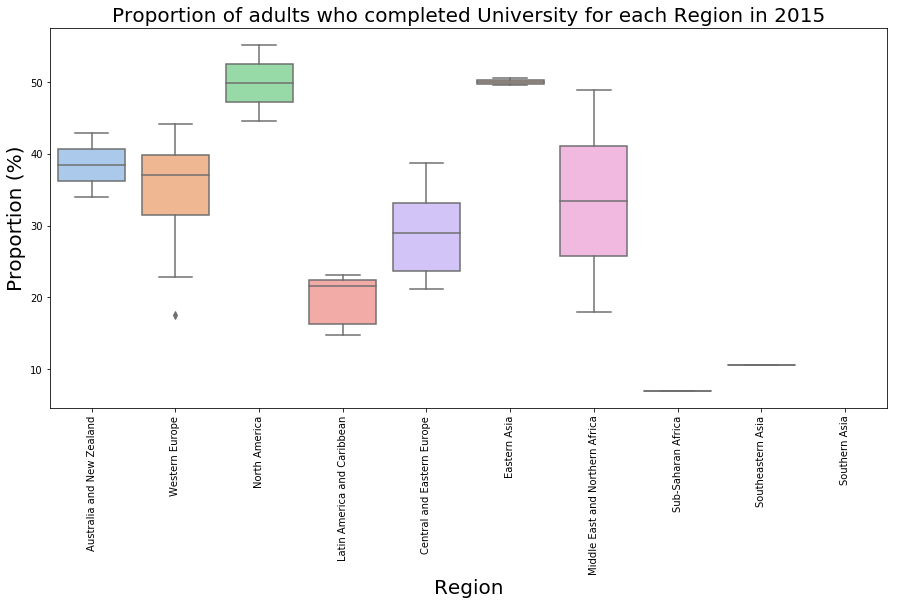

In [128]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x="Region", y = "Value_adult_education", data = df[df["TIME"] == 2015], palette = "pastel")
ax.set_title("Proportion of adults who completed University for each Region in 2015", fontsize = 20)
ax.set_ylabel("Proportion (%)")
plt.xticks(rotation=90)